In [3]:
# Import all the necessary libraries.
import random
import matplotlib.pyplot as plt
import math
import numpy as np
import functools
from matplotlib.animation import FuncAnimation
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from IPython.core.display import display, HTML

"""
Generate data points for plotting the error surface.
"""
def calculateErrorSurface(y, X):
    # Generate values for parameter space.
    N = 200
    a0 = np.linspace(-10.0, 14.0, N)
    a1 = np.linspace(-10.0, 14.0, N)

    A0, A1 = np.meshgrid(a0, a1)

    # Generate points for plotting the cost-function surface.
    J = np.zeros((N,N))
    for iter1 in range(0, N):
        for iter2 in range(0, N):
            yhat = A0[iter1][iter2] + A1[iter1][iter2]*X
            J[iter1][iter2] = (1/M)*np.sum( np.square(y - yhat)  )
            
    return J, A0, A1
            
"""
Calculate closed-form solution using the normal equation.
"""
def calculateClosedFormSolution(X):
    # Closed-form solution.
    a_opt = np.linalg.pinv(np.transpose(X).dot(X)).dot(np.transpose(X).dot(y))
    yhat = a_opt[0, 0] + a_opt[1, 0]*X
    Joptimum = (1/M)*np.sum(np.power((y - yhat), 2) )
    
    return Joptimum, a_opt

"""
Batch gradient descent solution.
"""
def batchGradientDescent(alpha, n_iterations, X_b, y):
    # Random initialization of parameters.
    a = np.zeros((2,1))
    a[0] = -10;
    a[1] = -10;

    # Create vector for parameter history.
    a_hist = np.zeros((2, n_iterations+1))
    # Initialize history vector.
    a_hist[0, 0] = a[0]
    a_hist[1, 0] = a[1]

    # Batch gradient-descent loop.
    for iteration in range(n_iterations):
        gradients = -2/M * X_b.T.dot(y - X_b.dot(a))
        a = a - alpha * gradients
        a_hist[0, iteration+1] = a[0]
        a_hist[1, iteration+1] = a[1]
        
    return a, a_hist

"""
Hypothesis Function
"""
def h(X_b, a):
    return a.T.dot(X_b.T)
    
## --------------------------------------------------------   
    
# Number of examples.
M = 1000

X = 2 * np.random.rand(M, 1)
y = 2 + 2 * X + np.random.randn(M, 1)

# add x0 = 1 to each instance.
X_b = np.c_[np.ones((M, 1)), X]
    
# Batch gradient descent solution.
alpha = 0.1  # learning rate
n_iterations = 1000

# Calculate data point for plotting error surface.
J, A0, A1 = calculateErrorSurface(y, X)

# Calculate closed-form solution.
Joptimum, a_opt = calculateClosedFormSolution(X_b)

# Run batch gradient-descent algorithm.
a, a_hist = batchGradientDescent(alpha, n_iterations, X_b, y)

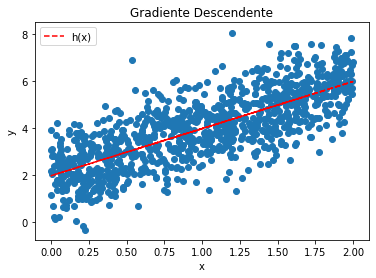

In [4]:
fig, ax = plt.subplots()
plt.scatter(X, y)
xl = []
yl = []
ln, = plt.plot(xl, yl, 'r--', animated=True, label='h(x)')
plt.title('Gradiente Descendente')

def init():
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    plt.legend(handles=[ln])
    return ln,

def update(frame):
    theta = np.zeros((2,1))
    theta[0] = a_hist[0,frame]
    theta[1] = a_hist[1,frame]
    f = functools.partial(h, a=theta)
    y = f(X_b)
    ln.set_data(X, y)
    return ln,

# Create animated figure.
ani = FuncAnimation(fig, update, frames=200, init_func=init, blit=False, interval=300)
# Display the animated figure.
display(HTML(ani.to_html5_video()))

# Save the animated figure.
#ani.save('animated_linear_regression.mp4', fps=30, extra_args=['-vcodec', 'libx264'])

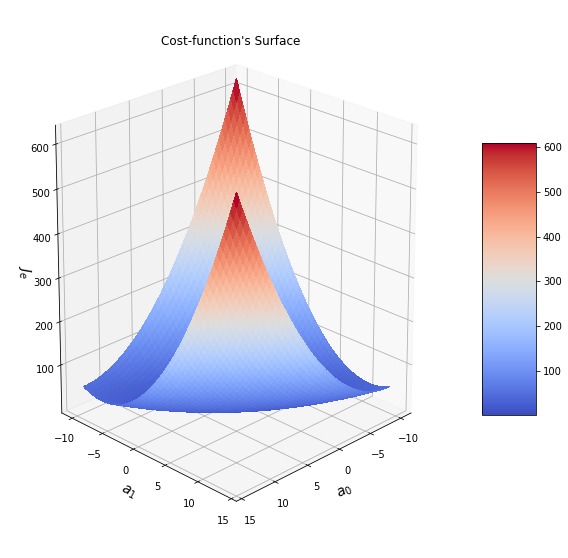

<Figure size 432x288 with 0 Axes>

In [5]:
# Plot cost-function surface.
fig = plt.figure(figsize=(10,10))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(A0, A1, J, cmap=cm.coolwarm, linewidth=0, antialiased=False)
# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.set_xlabel('$a_0$', fontsize=14)
ax.set_ylabel('$a_1$', fontsize=14)
ax.set_zlabel('$J_e$', fontsize=14);
plt.title('Cost-function\'s Surface')
ax.view_init(20, 45)
#Show the plot.
plt.show()
# Save figure into file.
plt.savefig("error_surface_bgd.png", dpi=600)

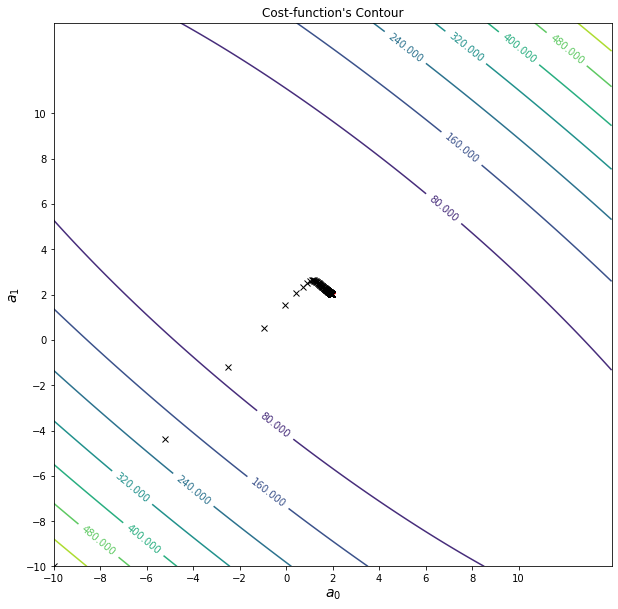

<Figure size 432x288 with 0 Axes>

In [6]:
# Plot figure.        
fig = plt.figure(figsize=(10,10))
cp = plt.contour(A0, A1, J)
plt.clabel(cp, inline=1, fontsize=10)
plt.xlabel('$a_0$', fontsize=14)
plt.ylabel('$a_1$', fontsize=14)
plt.title('Cost-function\'s Contour')
plt.plot(a_opt[0], a_opt[1], c='r', marker='*')
plt.plot(a_hist[0, 0:n_iterations], a_hist[1, 0:n_iterations], 'kx')
plt.xticks(np.arange(-10, 12, step=2.0))
plt.yticks(np.arange(-10, 12, step=2.0))
plt.show()
# save figure into file.
plt.savefig("error_contour_bgd.png", dpi=600)

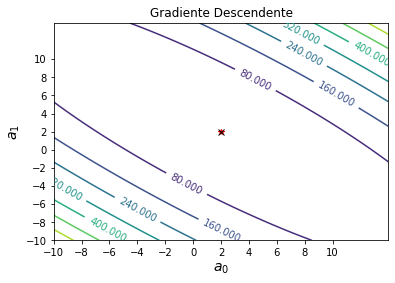

In [7]:
fig, ax = plt.subplots()
cp = plt.contour(A0, A1, J)
plt.clabel(cp, inline=1, fontsize=10)
plt.plot(a_opt[0], a_opt[1], c='r', marker='*')
xl = []
yl = []
ln, = plt.plot(xl, yl, 'kx', animated=True)
plt.title('Gradiente Descendente')
plt.xticks(np.arange(-10, 12, step=2.0))
plt.yticks(np.arange(-10, 12, step=2.0))

def init():
    ax.set_xlabel('$a_0$', fontsize=14)
    ax.set_ylabel('$a_1$', fontsize=14)
    return ln,

def update(frame):
    ln.set_data(a_hist[0, frame], a_hist[1, frame])
    return ln,

ani2 = FuncAnimation(fig, update, frames=200, init_func=init, blit=False, interval=1000)
display(HTML(ani2.to_html5_video()))

#ani2.save('animated_linear_regression_contour.mp4', fps=30, extra_args=['-vcodec', 'libx264'])